In [139]:
import numpy as np
import soundfile as sf
from omegaconf import OmegaConf

import IPython.display as ipd

from clarity.enhancer.compressor import Compressor
from clarity.enhancer.nalr import NALR

import matplotlib.pyplot as plt

In [140]:
file = "car"
# file = "factory"
# file = "helicopter"
# file = "nyc_street"
# file = "restaurant"
# file = "subway"

wav_noisy, sr = sf.read(f"./tmp/wav_noisy/{file}.wav")
wav, sr = sf.read(f"./tmp/wav/{file}_enh.wav")

([<matplotlib.lines.Line2D at 0x2baa2aee0>], (175946,))

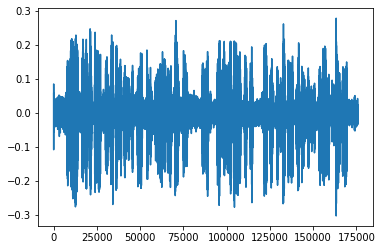

In [141]:
plt.plot(wav), wav.shape

In [142]:
ipd.Audio(wav, rate=sr)

In [143]:
cfg = OmegaConf.load("./recipes/icassp_2023/MLbaseline/config.yaml")


audiogram = {'name': 'L0064', 
                'audiogram_cfs': [250, 500, 1000, 2000, 3000, 4000, 6000, 8000], 
                'audiogram_levels_l': [50, 55, 60, 75, 80, 80, 80, 85], #[40, 30, 20, 50, 60, 65, 80, 75], 
                'audiogram_levels_r': [40, 35, 30, 50, 60, 75, 80, 80]}

In [144]:
enhancer = NALR(**cfg.nalr)
compressor = Compressor(**cfg.compressor) 

cfs = np.array(audiogram["audiogram_cfs"])
audiogram = np.array([audiogram[f"audiogram_levels_l"], 
                    audiogram[f"audiogram_levels_r"]])

nalr_fir, _ = enhancer.build(audiogram[0], cfs)

In [145]:
out = enhancer.apply(nalr_fir, wav)
out, _, _ = compressor.process(out)
if cfg.soft_clip:
    out = np.tanh(out)


In [146]:
out_noisy = enhancer.apply(nalr_fir, wav_noisy)
out_noisy, _, _ = compressor.process(out_noisy)
if cfg.soft_clip:
    out_noisy = np.tanh(out_noisy)


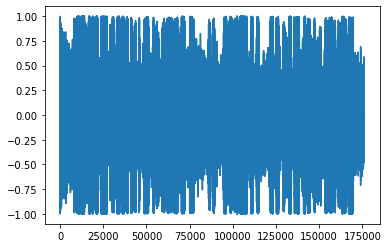

In [147]:
plt.plot(out)

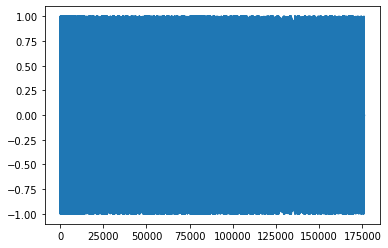

In [148]:
plt.plot(out_noisy)

In [149]:
ipd.Audio(out, rate=sr)

In [150]:
ipd.Audio(out_noisy, rate=sr)

In [151]:
sf.write(file=f"./tmp/wav_enh_amplified/{file}_enh_amplified.wav", 
         data=out,
         samplerate=sr)